# Exercício 2.3
Utilizando o exemplo visto em sala com o dataset CC_GENERAL.csv, aplique o algoritmo DBSCAN e tente construir uma busca de parâmetros para calibrar o min_samples e o eps.
Faça a plotagem da clusterização gerada (com cores diferentes para cada cluster). 

* a) Qual é a melhor quantidade de Clusters utilizando o método silhueta?
* b) Qual é a melhor técnica (k-means ou DBSCAN) a ser utilizada nesse conjunto de dados?

In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
import seaborn as sb
from itertools import cycle
from sklearn import datasets
from sklearn import metrics

from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import NearestNeighbors

In [2]:
#This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.
#Following is the Data Dictionary for Credit Card dataset :

#CUST_ID : Identification of Credit Card holder (Categorical) 
#BALANCE : Balance amount left in their account to make purchases  - Valor do saldo restante em sua conta para fazer compras 
#BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) - Com que frequência o saldo é atualizado, pontuação entre 0 e 1 (1 = atualizado com frequência, 0 = não atualizado com frequência)
#PURCHASES : Amount of purchases made from account 
#ONEOFF_PURCHASES : Maximum purchase amount done in one-go - quantidade máxima de compra feita de uma vez 
#INSTALLMENTS_PURCHASES : Amount of purchase done in installment  - Valor da compra parcelado
#CASH_ADVANCE : Cash in advance given by the user - Dinheiro a vista dado pelo usuário
#PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) - Com que frequência as compras estão sendo feitas, pontuação entre 0 e 1 
#ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) - Com que frequência as compras acontecem de uma só vez (1 = comprado com frequência, 0 = comprado com pouca frequência)
#PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) - Com que frequência as compras parceladas estão sendo feitas
#CASHADVANCEFREQUENCY : How frequently the cash in advance being paid 
#CASHADVANCETRX : Number of Transactions made with "Cash in Advanced" - Número de transações feitas com "Dinheiro adiantado"
#PURCHASES_TRX : Number of purchase transactions made - Numbem of purchase transactions made 
#CREDIT_LIMIT : Limit of Credit Card for user - Limite de cartão de crédito para o usuário
#PAYMENTS : Amount of Payment done by user 
#MINIMUM_PAYMENTS : Minimum amount of payments made by user - Quantidade mínima de pagamentos feitos pelo usuário 
#PRCFULLPAYMENT : Percent of full payment paid by user - Porcentagem do pagamento total pago pelo usuário
#TENURE : Tenure of credit card service for user - Posse do serviço de cartão de crédito para o usuário

#Faz a leitura do dataset
dataset = pd.read_csv('bases/CC_GENERAL.csv')
dataset = dataset.drop('CUST_ID', axis = 1) 

#Preenche as células vazias (NA) copiando a próxima observação válida para esta que é NA
dataset.fillna(method ='ffill', inplace = True) 

dataset.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
#Normaliza os Dados:
scaler = StandardScaler() 
dataset_norm = scaler.fit_transform(dataset) 

In [4]:
X = dataset_norm.copy()

# Encontrando o melhor epsilon via silhouette_score
eps_grid = np.linspace(1, 20, num=25)
ms_grid = range(5, 30, 10)
eps_best = eps_grid[0]
ms_best = ms_grid[0]
silhouette_score_max = -1


for min_sample in ms_grid:
    for eps in eps_grid:
        # Treinar o DBSCAN cluster
        model = DBSCAN(eps=eps, min_samples=min_sample).fit(X)
        # Obter as labels
        labels = model.labels_
        if len(set(labels)) > 1:
            # Obter as mmetricas de performance
            silhouette_score = round(metrics.silhouette_score(X, labels), 4)
            if silhouette_score > silhouette_score_max:
                print("Epsilon:", round(eps, 4), "Min Sample: ", min_sample, "--> silhouette score:", silhouette_score)
                silhouette_score_max = silhouette_score
                eps_best = eps
                ms_best = min_sample

# Melhores (hiper)parametros
print("Melhor epsilon =", eps_best, "e melhor min sample =", ms_best)

Epsilon: 1.0 Min Sample:  5 --> silhouette score: -0.2502
Epsilon: 1.7917 Min Sample:  5 --> silhouette score: 0.1802
Epsilon: 2.5833 Min Sample:  5 --> silhouette score: 0.5731
Epsilon: 3.375 Min Sample:  5 --> silhouette score: 0.6623
Epsilon: 4.1667 Min Sample:  5 --> silhouette score: 0.7079
Epsilon: 4.9583 Min Sample:  5 --> silhouette score: 0.7122
Epsilon: 5.75 Min Sample:  5 --> silhouette score: 0.7481
Epsilon: 6.5417 Min Sample:  5 --> silhouette score: 0.7953
Epsilon: 7.3333 Min Sample:  5 --> silhouette score: 0.804
Epsilon: 8.125 Min Sample:  5 --> silhouette score: 0.8114
Epsilon: 8.9167 Min Sample:  5 --> silhouette score: 0.8296
Epsilon: 11.2917 Min Sample:  5 --> silhouette score: 0.8299
Epsilon: 12.0833 Min Sample:  5 --> silhouette score: 0.84
Epsilon: 12.875 Min Sample:  5 --> silhouette score: 0.8408
Epsilon: 12.875 Min Sample:  15 --> silhouette score: 0.8529
Epsilon: 13.6667 Min Sample:  15 --> silhouette score: 0.8538
Epsilon: 15.25 Min Sample:  25 --> silhouett

In [5]:
dbsdata = dataset_norm.copy()

db = DBSCAN(eps=eps_best, min_samples=ms_best).fit(dbsdata)
print(set(db.labels_))

{0, -1}


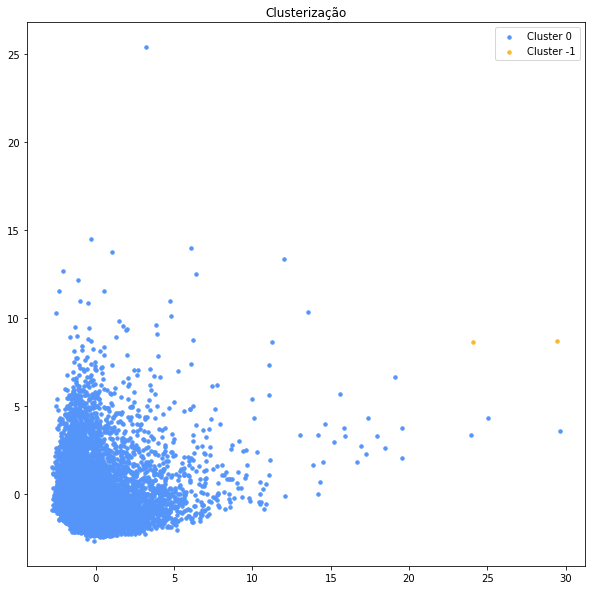

In [6]:
labels = db.labels_ 

pca = PCA(n_components=2).fit_transform(dataset_norm)

plt.figure(3, figsize=(10,10))
plt.scatter(pca[labels == 0, 0], pca[labels == 0, 1], s = 12, c = '#5595FA', label = 'Cluster 0')
plt.scatter(pca[labels == -1, 0], pca[labels == -1, 1], s = 12, c = '#FAB72F', label = 'Cluster -1')

plt.legend()
plt.title('Clusterização')
plt.show()

## a) Qual é a melhor quantidade de Clusters utilizando o método silhueta?
A partir da grid search o melhor resultado de silhouete score encontrado foi de 1 cluster enquanto algumas observações não puderam ser clusterizadas (possivelmente outliers).

## b) Qual é a melhor técnica (k-means ou DBSCAN) a ser utilizada nesse conjunto de dados?
Comparando com a clusterização feita em sala, o DBSCAN não foi capaz de separar os clusters, enquanto o K-means foi capaz de separar em 3 difereentes grupos, portanto o método k-means foi mais eficiente para este conjunto de dados. 
